This first notebook contains the first steps to get a solid grasp in the **House Prediction Challenge**, as introduced in the **Kaggle Competition**.

The Dataset is split into a training set and a test set.  The training set consists of 1,460 houses and 81 features.

We will showcase an exhaustive **Exploratory Data Analysis (EDA)** to get prior insights in the dataset, determine the data types of each attribute and if the dataset presents **missing data** (and its percentage). 

Consequently, we will device a strategy to impute missing data. A common approach is to plot the attribute distribution and ask if there is a clever way to fill the non-value cells, if it is not, then we will conduct different optimization techniques to fill this gap. Before executing the imputing technique, it is strongly suggested to remove any outlier in order to remove any noise in the distribution that may affect the data filling process.

Once we get a complete tidy dataset, we will proceed to find the most relevant features, by leveraging correlation analysis and other approaches. 

From the remaining features, maybe there are a subset of them represented as a numerical variable that could be represented as a categories. If said attributes do exist, then we will convert them to categories using an integer representation o one-hot encoding.





**Kaggle Dataset Feature Description:** <br>
**SalePrice** - the property's sale price in dollars. This is the target variable that you're trying to predict. <br>
**MSSubClass:** The building class <br>
**MSZoning:** The general zoning classification                          <br>
**LotFrontage:** Linear feet of street connected to property <br>
**LotArea:** Lot size in square feet <br>
**Street:** Type of road access <br>
**Alley:** Type of alley access <br>
**LotShape:** General shape of property <br>
**LandContour:** Flatness of the property <br>
**Utilities:** Type of utilities available <br>
**LotConfig:** Lot configuration <br>
**LandSlope:** Slope of property <br>
**Neighborhood:** Physical locations within Ames city limits <br>
**Condition1:** Proximity to main road or railroad <br>
**Condition2:** Proximity to main road or railroad (if a second is present) <br>
**BldgType:** Type of dwelling <br>
**HouseStyle:** Style of dwelling <br>
**OverallQual:** Overall material and finish quality <br>
**OverallCond:** Overall condition rating <br>
**YearBuilt:** Original construction date <br>
**YearRemodAdd:** Remodel date <br>
**RoofStyle:** Type of roof <br>
**RoofMatl:** Roof material <br>
**Exterior1st**: Exterior covering on house <br>
**Exterior2nd**: Exterior covering on house (if more than one material) <br>
**MasVnrType:** Masonry veneer type <br>
**MasVnrArea:** Masonry veneer area in square feet <br>
**ExterQual:** Exterior material quality <br>
**ExterCond:** Present condition of the material on the exterior <br>
**Foundation:** Type of foundation <br>
**BsmtQual:** Height of the basement <br>
**BsmtCond:** General condition of the basement <br>
**BsmtExposure:** Walkout or garden level basement walls <br>
**BsmtFinType1:** Quality of basement finished area <br>
**BsmtFinSF1:** Type 1 finished square feet <br>
**BsmtFinType2:** Quality of second finished area (if present) <br>
**BsmtFinSF2:** Type 2 finished square feet <br>
**BsmtUnfSF:** Unfinished square feet of basement area <br>
**TotalBsmtSF**: Total square feet of basement area <br>
**Heating:** Type of heating <br>
**HeatingQC:** Heating quality and condition <br>
**CentralAir:** Central air conditioning <br>
**Electrical:** Electrical system <br>
**1stFlrSF:** First Floor square feet <br>
**2ndFlrSF:** Second floor square feet <br>
**LowQualFinSF:** Low quality finished square feet (all floors) <br>
**GrLivArea:** Above grade (ground) living area square feet <br>
**BsmtFullBath:** Basement full bathrooms <br>
**BsmtHalfBath:** Basement half bathrooms <br>
**FullBath:** Full bathrooms above grade <br>
**HalfBath:** Half baths above grade <br>
**Bedroom:** Number of bedrooms above basement level <br>
**Kitchen:** Number of kitchens <br>
**KitchenQual:** Kitchen quality <br>
**TotRmsAbvGrd:** Total rooms above grade (does not include bathrooms) <br>
**Functional:** Home functionality rating <br>
**Fireplaces:** Number of fireplaces <br>
**FireplaceQu**: Fireplace quality <br>
**GarageType:** Garage location <br>
**GarageYrBlt**: Year garage was built <br>
**GarageFinish:** Interior finish of the garage <br>
**GarageCars:** Size of garage in car capacity <br>
**GarageArea:** Size of garage in square feet <br>
**GarageQual:** Garage quality <br>
**GarageCond:** Garage condition <br>
**PavedDrive:** Paved driveway <br>
**WoodDeckSF:** Wood deck area in square feet <br>
**OpenPorchSF**: Open porch area in square feet <br>
**EnclosedPorch:** Enclosed porch area in square feet <br>
**3SsnPorch:** Three season porch area in square feet <br>
**ScreenPorch**: Screen porch area in square feet <br>
**PoolArea**: Pool area in square feet <br>
**PoolQC:** Pool quality <br>
**Fence:** Fence quality <br>
**MiscFeature:** Miscellaneous feature not covered in other categories <br>
**MiscVal:** $Value of miscellaneous feature <br>
**MoSold:** Month Sold <br>
**YrSold:** Year Sold <br>
**SaleType**: Type of sale <br>
**SaleCondition:** Condition of sale <br>

Libraries

In [49]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt

# Import the datasets

In [2]:
df = pd.read_csv("train.csv")
df.head()
num_obs, num_feats = df.shape
df_test = pd.read_csv("test.csv")

# Exploratory Data Analysis (EDA)

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
print(f"unique feature datatypes : \n {df.dtypes.value_counts()}")

unique feature datatypes : 
 object     43
int64      35
float64     3
Name: count, dtype: int64


It appears that half the features are categorical

In [6]:
cols_missing_data_count = df.isnull().sum()
cols_missing_data = cols_missing_data_count.loc[cols_missing_data_count.values > 0].sort_values(ascending=False)
print(f"Df missing data : \n {cols_missing_data}")

Df missing data : 
 PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64


In [20]:
df[cols_missing_data.index].dtypes

PoolQC           object
MiscFeature      object
Alley            object
Fence            object
MasVnrType       object
FireplaceQu      object
LotFrontage     float64
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
GarageCond       object
BsmtExposure     object
BsmtFinType2     object
BsmtQual         object
BsmtCond         object
BsmtFinType1     object
MasVnrArea      float64
Electrical       object
dtype: object

In [7]:
percentage_missing_data = (cols_missing_data / num_obs ) * 100
print(f"Percentage DF missing data : \n {percentage_missing_data}")

Percentage DF missing data : 
 PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
MasVnrType      59.726027
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
MasVnrArea       0.547945
Electrical       0.068493
dtype: float64


In [8]:
print(f"Number of attributes with missing data: {percentage_missing_data.count()}")

Number of attributes with missing data: 19


In [9]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Handling Missing Data

As seen before, we have 19 features with missing values. We will categorize each feature into a group depending on its percentage level.
The first group consists of 4 features [ **PoolQC, MiscFeature, Alley, Fence**] with > 80% of missing data.
The second group consists of 2 features [ **MasVnrType, FireplaceQu**] containing roughly 50% of missing data.
The third group consists of 13 features  containing less than 20% of missing data.

Let's inspect each group to device a strategy to handle their missing data.

In [10]:
#Categorical columns
df.select_dtypes(["object"]).columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

## First group

Feature: PoolQC -> Pool Quality. Category Missing data percentage : 99.5 %.

In [11]:
#extract rows where pool quality is zero, analyze the result to see if tehre is a pattern
df.loc[df["PoolQC"].isnull(), ["PoolArea"]].sum()


PoolArea    0
dtype: int64

In [12]:
df["PoolArea"].loc[df["PoolArea"] > 0.0].count()

np.int64(7)

Conclusion: The previous analysis helped us to find that a NaN value for PoolQC corresponds to the default value from the extracted database. A null PoolQC value matches a corresponding PoolArea of 0.0, thus, we conclude that these cases denote that this property **does not include a pool**. 

With 99.52% of missing data it is safe to remove from the dataset both **PoolQC and PoolArea**

In [13]:
cols_to_remove = ["PoolQC","PoolArea"]

Feature: MiscFeature -> Miscelanious features. Category Missing data percentage : 96.3 %.

In [14]:
df["MiscFeature"].describe()

count       54
unique       4
top       Shed
freq        49
Name: MiscFeature, dtype: object

In [15]:
df["MiscFeature"].value_counts()

MiscFeature
Shed    49
Gar2     2
Othr     2
TenC     1
Name: count, dtype: int64

Correlation analysis MiscFeature with house pricing 

In [16]:
misc_feat_enc = LabelEncoder().fit_transform(df["MiscFeature"])
print(f"Misc Feature stats : {np.unique(misc_feat_enc,return_counts=True)}")
df_temp = pd.DataFrame({
    "MiscFeatureEnc" : misc_feat_enc
})

Misc Feature stats : (array([0, 1, 2, 3, 4]), array([   2,    2,   49,    1, 1406]))


<Axes: >

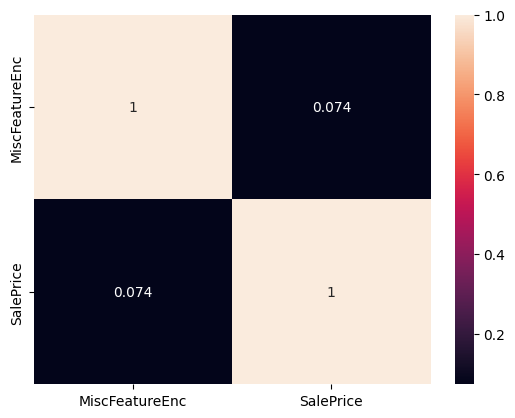

In [17]:
sns.heatmap(data=pd.concat([df_temp,df["SalePrice"]],axis=1).corr(),annot=True)

Conclusion: This feature implicates the presence of aggregated features that may be useful for the prediction, encoded as a categorical variable. Thus, any house that lefts this cell empty means that it did not include any extra information (default null in database). The previous correlation analysis highlights that this feature has nearly zero correlation with House Sales Prices, probably adding this feature to the data modeling will not contribute to a better house price prediciton. We omit this feature.

In [18]:
cols_to_remove.append("MiscFeature")

Feature: Alley. Category Missing data percentage : 93.7 %.
Assumption: Null value means that the property does not possess alley

In [22]:
df["Alley"].value_counts()

Alley
Grvl    50
Pave    41
Name: count, dtype: int64

Correlation analysis Alley with house pricing 

In [23]:
misc_alley_enc = LabelEncoder().fit_transform(df["Alley"])
print(f"Alley stats : {np.unique(misc_alley_enc,return_counts=True)}")
df_temp = pd.DataFrame({
    "AlleyEnc" : misc_alley_enc
})

Alley stats : (array([0, 1, 2]), array([  50,   41, 1369]))


<Axes: >

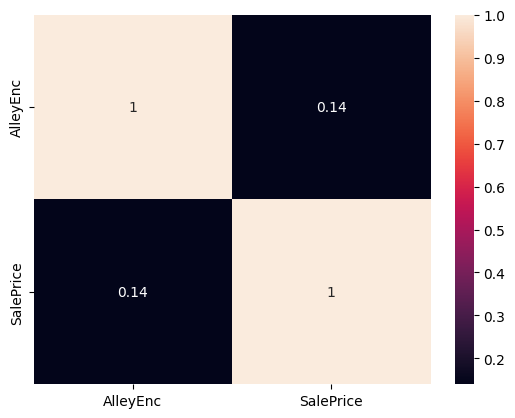

In [24]:
sns.heatmap(data=pd.concat([df_temp,df["SalePrice"]],axis=1).corr(),annot=True)

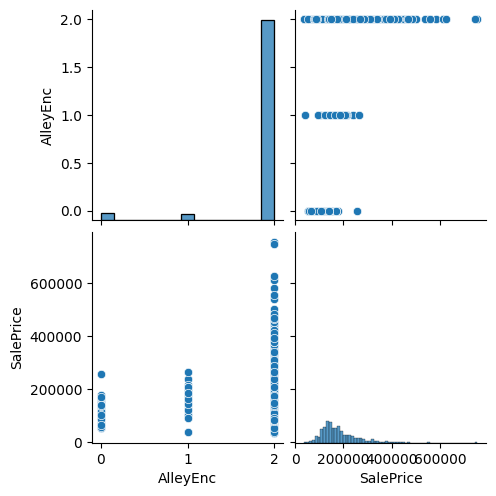

In [26]:
sns.pairplot(data=pd.concat([df_temp,df["SalePrice"]]))

Conclusion: In the lowest range of house prices, from 0 to rougly 300k, appears that price increase is independent of Alley type. Looking at the distribution of SalesPrice Data, it exhibits a normal distribution with mean around 150k, therefore the house with prices > 300K are the minority, the "No Alley" category from this range and upward may not contribute to effectively predicting the house prices in this dataset. We discard this feature for the House Pricing Predictor.

In [27]:
cols_to_remove.append("Alley")

Feature: Fence -> Fence Quality. Category Missing data percentage : 80.75 %.
Assumption: Null value means that the property does not possess Fence

In [28]:
df["Fence"].value_counts()

Fence
MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: count, dtype: int64

Correlation analysis Fence with house pricing 

In [29]:
misc_fence_enc = LabelEncoder().fit_transform(df["Fence"])
print(f"Fence stats : {np.unique(misc_fence_enc,return_counts=True)}")
df_temp = pd.DataFrame({
    "FenceEnc" : misc_fence_enc
})

Fence stats : (array([0, 1, 2, 3, 4]), array([  59,   54,  157,   11, 1179]))


<Axes: >

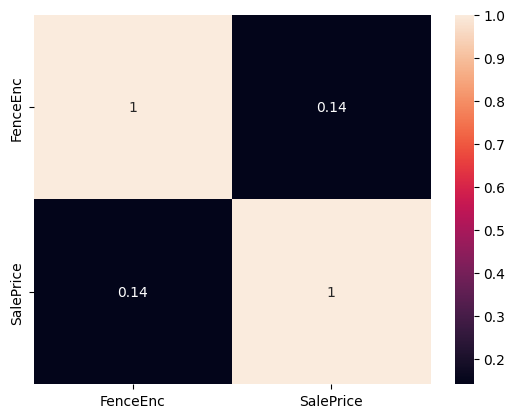

In [30]:
sns.heatmap(data=pd.concat([df_temp,df["SalePrice"]],axis=1).corr(),annot=True)

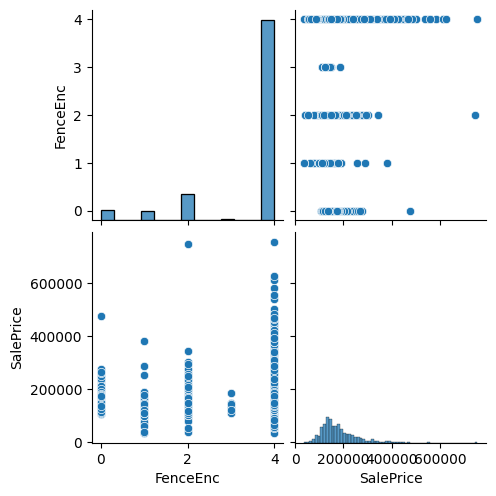

In [34]:
sns.pairplot(data=pd.concat([df_temp,df["SalePrice"]]))

For a stronger analysis, let's preserve FenceEnc values that lies within the Interquartile Range of SalePrice normal distribution

In [32]:
df["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [42]:
df_saleprice_ir = df["SalePrice"][(df["SalePrice"] >= 129975) & (df["SalePrice"] <= 214000)]
df_fence_enc_ir = df_temp.iloc[df_saleprice_ir.index]

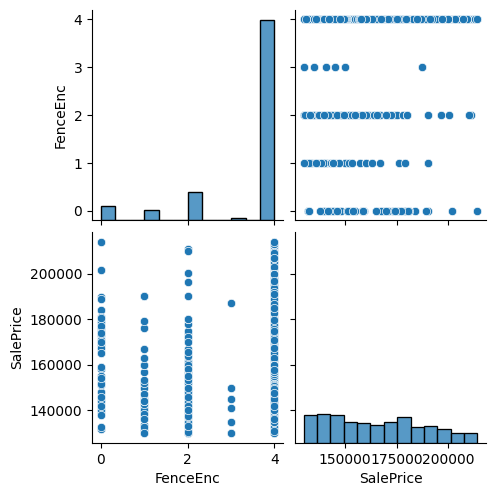

In [53]:

sns.pairplot(data=pd.concat([df_fence_enc_ir,df_saleprice_ir]))


Previous plot shows the distribution of **Fence** variable datapoints with respect to the distribution of the interquartile **SalePrice** variable. There are 3 categories from Fence that their data intervals superpose with each other as the SalePrice range increases, therefore, it would be extremely odd that this feature provides any prediction capability to the model. We chose to discard this feature.

In [54]:
cols_to_remove.append("Fence")

## Second group